In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("data/cdr.csv")
data["DATE"] = pd.to_datetime(data['<DATE>'], format='%Y%m%d')
data["VALUE"] = data["<CLOSE>"]
data = data[["DATE", "VALUE"]]

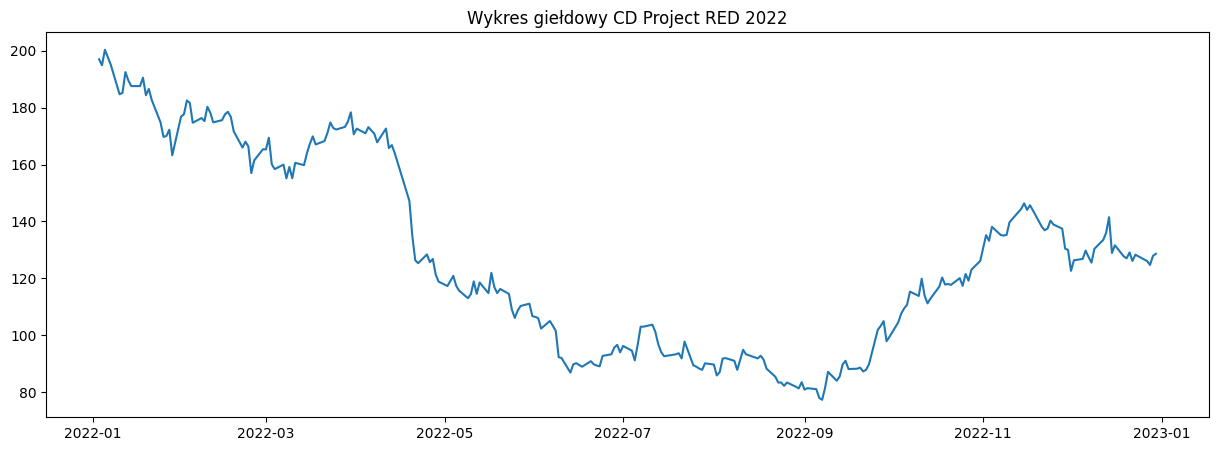

In [41]:
plot_data = data[(data['DATE'] >= '2022-01-01') & (data['DATE'] < '2023-01-01')]
plt.figure(figsize=(15, 5))
plt.plot(plot_data["DATE"].values, plot_data["VALUE"].values)
plt.title("Wykres giełdowy CD Project RED 2022")
plt.show()

In [42]:
def calculate_ema(n: int, from_col: str, to_col: str):
    weight = 1 - (2 / (n + 1))
    for rowIndex in range(n, len(data.index)):
        nominator = 0
        denominator = 0
        for i in range(0, n + 1):
            p = data[from_col].iloc[rowIndex - i]
            nominator += p *(weight**i)
            denominator += weight**i
        data.loc[rowIndex, to_col] = nominator / denominator

calculate_ema(12, "VALUE", "EMA12")
calculate_ema(26, "VALUE", "EMA26")
data["MACD"] = data["EMA12"] - data["EMA26"]
calculate_ema(9, "MACD", "SIGNAL")

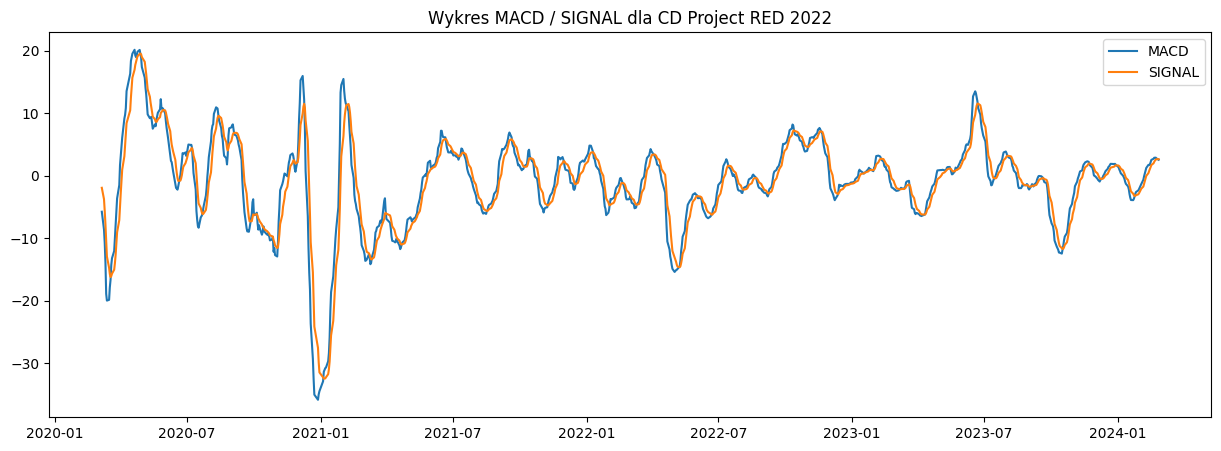

In [43]:
plot_data = data[(data['DATE'] >= '2020-03-06') & (data['DATE'] < '2024-02-27')]
plt.figure(figsize=(15, 5))
plt.plot(plot_data["DATE"].values, plot_data["MACD"].values)
plt.plot(plot_data["DATE"].values, plot_data["SIGNAL"].values)
plt.legend(['MACD', 'SIGNAL'])
plt.title("Wykres MACD / SIGNAL dla CD Project RED 2022")
plt.show()

In [44]:
data["OVER"] = data["MACD"] >= data["SIGNAL"]
data["ACTION"] = 'NONE'

for i in range(1, len(data.index)):
    a = data.loc[i, 'OVER']
    b = data.loc[i-1, 'OVER']
    if (a and b) or (not a and not b):
        continue
    if a and not b:
        data.loc[i, "ACTION"] = 'BUY'
    else:
        data.loc[i, "ACTION"] = 'SELL'